# Busqueda por Profundidad

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [10]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [4]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.
Subir el cuaderno con la resolucion.


['Casa', 'Fray Vicente', 'Manchitas del Saber', 'Escuela ABC', 'Abejitas', 'La Salle', 'Bilingue', 'Tecnico Salesiano']


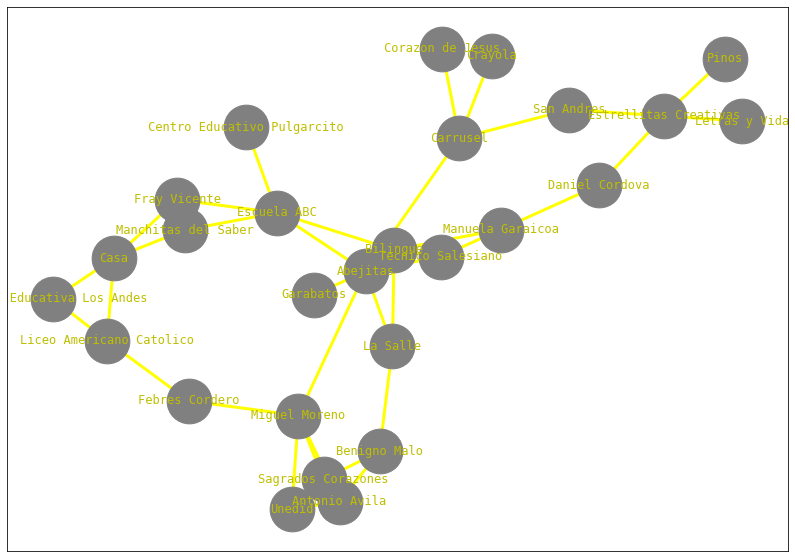

In [5]:
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
def search_profundidad(no,init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list=[]        
        for node in no[node_data]:
            child = Node(node)
            child_list.append(child)
        init_node.set_child(child_list)

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(no,node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

# Diccionario de escuelas
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import networkx as nx
    import warnings
    warnings.filterwarnings('ignore')
centros = {
        'Casa': {'Fray Vicente', 'Liceo Americano Catolico', 'Unidad Educativa Los Andes'},
        'Unidad Educativa Los Andes': {'Casa', 'Liceo Americano Catolico'},
        'Manchitas del Saber': {'Escuela ABC','Casa'},
        'Fray Vicente': {'Manchitas del Saber', 'Casa','Escuela ABC'},
        'Escuela ABC': {'Centro Educativo Pulgarcito','Bilingue','Abejitas'},
        'Liceo Americano Catolico': {'Febres Cordero'},
        'Febres Cordero': {'Miguel Moreno'},
        'Abejitas': {'Garabatos','Carrusel','Miguel Moreno','La Salle'},
        'Miguel Moreno': {'Antonio Avila', 'Unedid','Sagrados Corazones'},
        'Unedid': {'Antonio Avila','Sagrados Corazones'},
        'La Salle': {'Bilingue','Benigno Malo'},
        'Sagrados Corazones':{'Antonio Avila'},
        'Antonio Avila':{'Unedid','Sagrados Corazones'},
        'Benigno Malo':{'Sagrados Corazones', 'Antonio Avila'},
        'Carrusel': {'Crayola', 'San Andres','Corazon de Jesus'},
        'San Andres': {'Estrellitas Creativas'},
        'Estrellitas Creativas': {'Letras y Vida', 'Pinos','Daniel Cordova'},
        'Daniel Cordova': {'Manuela Garaicoa','Daniel Cordova'},
        'Manuela Garaicoa': {'Bilingue','Tecnico Salesiano'},
        'Bilingue': {'Tecnico Salesiano','Abejitas'},
        'Tecnico Salesiano': {'Abejitas'}
        
}

#----
init_state = 'Casa' # Creamos un estado inicial
solution = 'Tecnico Salesiano' # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
gf = nx.Graph(centros)

node = search_profundidad(centros,init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

plt.figure(1,figsize=(14,10))
pos =nx.spring_layout(gf)
nx.draw_networkx(gf,pos,font_color='y',
        font_family='monospace',
        node_color="grey",
        edge_color="YELLOW",
        font_size=12,
        width=3, 
        with_labels=True, 
        node_size=2000) 
plt.show()


#### Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.

In [1]:
tablero=[0,0,0,0]
fila=0
def CuatroReinas(tablero,fila,n):
    if fila>=n:
        return False

    enc = False

    while True:
            if (tablero[fila] < n):
                tablero[fila] = tablero[fila] + 1
            if (Validar(tablero,fila)):
                
                if fila != n-1:
                    enc = CuatroReinas(tablero, fila+1,n)
                    if enc==False:
                        tablero[fila+1] = 0
                else:
                    print('Respuesta **',tablero ,'**')
                    enc = True
            if (tablero[fila]==n or enc==True):
                break
    return enc

def Validar(tablero,fila):
    for i in range(fila):
        if (tablero[i]==tablero[fila]) or (abs(fila-i)== abs(tablero[fila]-tablero[i])):
            return False
    return True
print("Solucion ", CuatroReinas(tablero,fila,4))


Respuesta ** [2, 4, 1, 3] **
Solucion  True


# Conclusiones